In [47]:
from fileIO import *
from constants import * 
import numpy as np
import matplotlib.pyplot as plt

"""
Import 2D cuDisc run
"""

sim = CuDiscModel("../outputs/icevap_example/0")

# Load in grids, densities and temperatures

g = sim.grid
sizes = sim.load_grain_sizes()
gas, dust = sim.load_all_prim_data()
temp = sim.load_all_temp_data()

CO = sim.load_mol()
opacs = sim.load_opacity()

def calc_sig_dust(g, dust, sizes):
    sig_d_tot = np.zeros((g.R.shape[0], dust.rho.shape[0]))
    Z_e = g.R_c[:,None] * g.tan_th_e 

    sig_d = 2.*np.sum(dust.rho[:,:,2:-2,:] * np.diff(Z_e[None,:,2:-2,None],axis=2), axis=2)
    sig_d_tot = 2.*np.sum(dust.rho[:,:,2:-2,:].sum(-1) * np.diff(Z_e[None,:,2:-2]), axis=2)
    vRbar = np.sum(dust.rho[:,:,2:-2,:] * dust.vR[:,:,2:-2,:] * np.diff(Z_e[None,:,2:-2,None],axis=2), axis=2)/np.sum(dust.rho[:,:,2:-2,:] * np.diff(Z_e[None,:,2:-2,None],axis=2), axis=2)

    return sig_d, sig_d_tot, vRbar


Sig_d, Sig_d_tot, vRbar = calc_sig_dust(g, dust, sizes)

Z_e = g.R_c[:,None] * g.tan_th_e 
Sig_CO = 2.*np.sum(CO.ice[:,:,2:-2,:,0].sum(-1)* np.diff(Z_e[None,:,2:-2],axis=2), axis=2)
Sig_COk = 2.*np.sum(CO.ice[:,:,2:-2,:,0]* np.diff(Z_e[None,:,2:-2,None],axis=2), axis=2)

Sig_COvap = 2.*np.sum(CO.vap[:,:,2:-2] * np.diff(Z_e[None,:,2:-2],axis=2), axis=2)
Sig_COtot = 2.*np.sum((CO.ice[:,:,2:-2,:,0].sum(-1)+CO.vap[:,:,2:-2]) * np.diff(Z_e[None,:,2:-2],axis=2), axis=2)

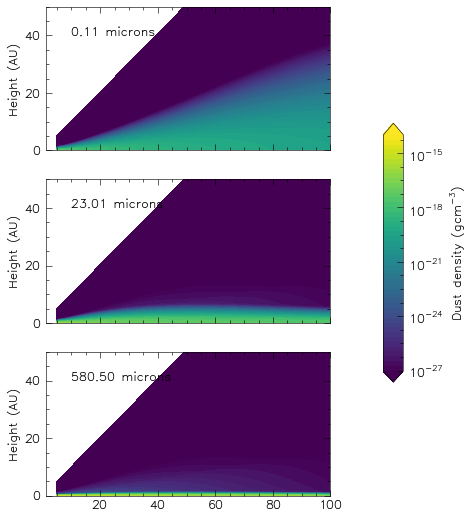

In [48]:
# Plot dust density 

t_snap = -1
grains = [0,50,80]

fig, ax = plt.subplots(len(grains), 1, figsize=(7, 3*len(grains)), sharex=True, sharey=True)

for i in range(len(grains)):
    ax[i].set_aspect("equal")
    con = ax[i].contourf(g.R/au, g.Z/au, np.log10(dust.rho[t_snap,:,:,grains[i]]), np.linspace(-27,-14,50), extend='both')
    con = ax[i].contourf(g.R/au, g.Z/au, np.log10(dust.rho[t_snap,:,:,grains[i]]), np.linspace(-27,-14,50), extend='both')
    #ax[i].quiver(g.R[::10,:100:10]/au, g.Z[::10,:100:10]/au, (dust.vR[t_snap,::10,:100:10,grains[i]]), (dust.vZ[t_snap,::10,:100:10,grains[i]]), color='white', scale=1000)
    ax[i].text(10,40, "%1.2f microns"%(sizes.a_c[grains[i]]*1e4), fontsize=16, c='k')
    ax[i].set_ylabel('Height (AU)')


plt.xlim(1,100)
plt.ylim(0,50)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.3, 0.04, 0.4])
cbar = fig.colorbar(con, cax=cbar_ax)
cbar.set_ticks(np.arange(-27,-12,3))
cbar.set_ticklabels(["$10^{%d}$"%(x) for x in np.arange(-27,-12,3)])
cbar.set_label(r"Dust density (gcm$^{-3}$)")

plt.show()


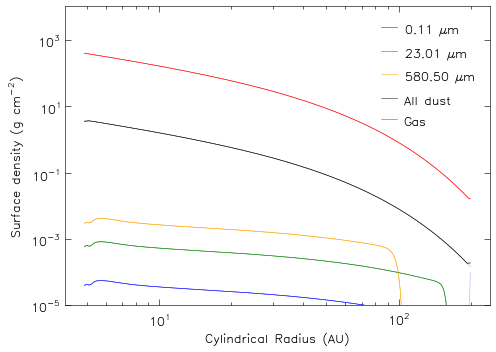

In [49]:
# Calculate and plot dust & gas surface density

plt.figure(figsize=(7,5))
for i in range(Sig_d.shape[0]):
    if i==Sig_d.shape[0]-1:
        plt.loglog(g.R[:,0]/au, Sig_d[i,:,grains[0]], color='b', label="%1.2f $\mu$m"%(1e4*sizes.a_c[grains[0]]),alpha=0.3+i*0.75/Sig_d.shape[0])
        plt.loglog(g.R[:,0]/au, Sig_d[i,:,grains[1]], color='g', label="%1.2f $\mu$m"%(1e4*sizes.a_c[grains[1]]),alpha=0.3+i*0.75/Sig_d.shape[0])
        plt.loglog(g.R[:,0]/au, Sig_d[i,:,grains[2]], color='orange', label="%1.2f $\mu$m"%(1e4*sizes.a_c[grains[2]]),alpha=0.3+i*0.75/Sig_d.shape[0])
        plt.loglog(g.R[:,0]/au, Sig_d_tot[i,:], color='black', label="All dust",alpha=0.3+i*0.75/Sig_d.shape[0])
        plt.loglog(g.R[:,0]/au, gas.Sigma[i,:], color='r', label="Gas",alpha=0.3+i*0.75/Sig_d.shape[0])
    else:
        plt.loglog(g.R[:,0]/au, Sig_d[i,:,grains[0]], color='b',alpha=0.3+i*0.75/Sig_d.shape[0])
        plt.loglog(g.R[:,0]/au, Sig_d[i,:,grains[1]], color='g',alpha=0.3+i*0.75/Sig_d.shape[0])
        plt.loglog(g.R[:,0]/au, Sig_d[i,:,grains[2]], color='orange',alpha=0.3+i*0.75/Sig_d.shape[0])
        plt.loglog(g.R[:,0]/au, Sig_d_tot[i,:], color='black',alpha=0.3+i*0.75/Sig_d.shape[0])
        plt.loglog(g.R[:,0]/au, gas.Sigma[i,:], color='r',alpha=0.3+i*0.75/Sig_d.shape[0])

plt.ylim(1e-5, 10000)

#plt.xlim(3,19)
plt.ylabel(r"Surface density (g cm$^{-2}$)")
plt.xlabel('Cylindrical Radius (AU)')
plt.legend()
plt.tight_layout()
plt.show()


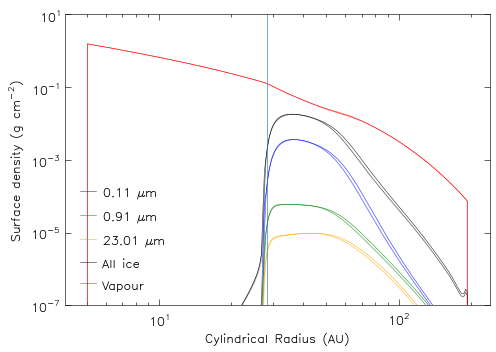

In [60]:
# Plot volatile surface density

plt.figure(figsize=(7,5))
for i in range(Sig_COk.shape[0]):
    if i==Sig_COk.shape[0]-1:
        plt.loglog(g.R[:,0]/au, Sig_COk[i,:,grains[0]], color='b', label="%1.2f $\mu$m"%(1e4*sizes.a_c[grains[0]]),alpha=0.3+i*0.75/Sig_COk.shape[0])
        plt.loglog(g.R[:,0]/au, Sig_COk[i,:,grains[1]], color='g', label="%1.2f $\mu$m"%(1e4*sizes.a_c[grains[1]]),alpha=0.3+i*0.75/Sig_COk.shape[0])
        plt.loglog(g.R[:,0]/au, Sig_COk[i,:,grains[2]], color='orange', label="%1.2f $\mu$m"%(1e4*sizes.a_c[grains[2]]),alpha=0.3+i*0.75/Sig_COk.shape[0])
        plt.loglog(g.R[:,0]/au, Sig_CO[i,:], color='black', label="All ice",alpha=0.3+i*0.75/Sig_COk.shape[0])
        plt.loglog(g.R[:,0]/au, Sig_COvap[i,:], color='r', label="Vapour",alpha=0.3+i*0.75/Sig_COk.shape[0])
    else:
        plt.loglog(g.R[:,0]/au, Sig_COk[i,:,grains[0]], color='b',alpha=0.3+i*0.75/Sig_COk.shape[0])
        plt.loglog(g.R[:,0]/au, Sig_COk[i,:,grains[1]], color='g',alpha=0.3+i*0.75/Sig_COk.shape[0])
        plt.loglog(g.R[:,0]/au, Sig_COk[i,:,grains[2]], color='orange',alpha=0.3+i*0.75/Sig_COk.shape[0])
        plt.loglog(g.R[:,0]/au, Sig_CO[i,:], color='black',alpha=0.3+i*0.75/Sig_COk.shape[0])
        plt.loglog(g.R[:,0]/au, Sig_COvap[i,:], color='r',alpha=0.3+i*0.75/Sig_COk.shape[0])

plt.ylim(1e-7, 10)
plt.plot([g.R_c[120]/au,g.R_c[120]/au], [1e-7,10])

#plt.xlim(3,19)
plt.ylabel(r"Surface density (g cm$^{-2}$)")
plt.xlabel('Cylindrical Radius (AU)')
plt.legend()
plt.tight_layout()
plt.show()


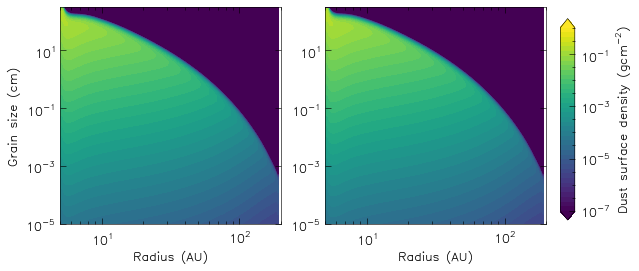

In [55]:
# Plot grain size distribution

R_a_grid, a_R_grid = np.meshgrid(g.R_c[2:-2], sizes.a_c, indexing='ij')

t_snaps = [0,-1]

fig, ax = plt.subplots(1, len(t_snaps), figsize = (5*len(t_snaps),4), sharex=True)

for i, ti in enumerate(t_snaps):
    con = ax[i].contourf(R_a_grid/au, a_R_grid, np.log10(Sig_d[ti,2:-2,:]+1e-100),np.linspace(-7,0,40), extend='both')
    ax[i].set_xlabel("Radius (AU)")
    ax[i].set_ylim(1e-5,300)
    ax[i].set_yscale('log')

ax[0].set_ylabel("Grain size (cm)")
plt.xscale('log')

plt.xlim(5,200)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.14, 0.02, 0.7])
cbar = fig.colorbar(con, cax=cbar_ax)
cbar.set_ticks(np.arange(-7,2,2))
cbar.set_ticklabels(["$10^{%d}$"%(x) for x in np.arange(-7,2,2)])
cbar.set_label(r"Dust surface density (gcm$^{-2}$)")

plt.show()
    

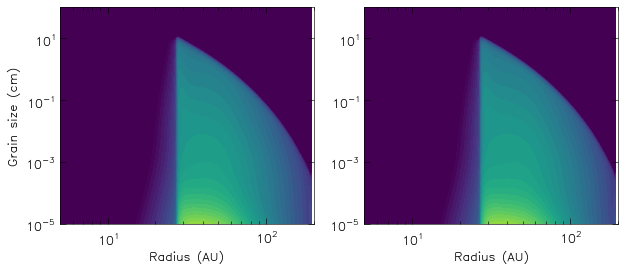

In [56]:
# Plot ice size distribution

R_a_grid, a_R_grid = np.meshgrid(g.R_c[2:-2], sizes.a_c, indexing='ij')

t_snaps = [0,-1]

fig, ax = plt.subplots(1, len(t_snaps), figsize = (5*len(t_snaps),4), sharex=True)

for i, ti in enumerate(t_snaps):
    con = ax[i].contourf(R_a_grid/au, a_R_grid, np.log10(Sig_COk[ti,2:-2,:]+1e-100),np.linspace(-10,-1,40), extend='both')
    ax[i].set_xlabel("Radius (AU)")
    ax[i].set_ylim(1e-5,100)
    ax[i].set_yscale('log')

ax[0].set_ylabel("Grain size (cm)")
plt.xscale('log')


plt.xlim(5,200)

plt.show()
    

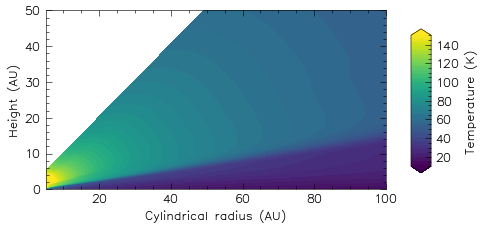

In [57]:
# Plot temperature 

t_snap = -1

fig, ax = plt.subplots(1, 1, figsize=(7, 5))

ax.set_aspect("equal")
con = ax.contourf(g.R/au, g.Z/au, temp.T[t_snap,:,:], np.linspace(10,150,50), extend='both')
ax.set_xlabel('Cylindrical radius (AU)')
ax.set_ylabel('Height (AU)')

plt.xlim(5,100)
plt.ylim(0,50)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.3, 0.04, 0.4])
cbar = fig.colorbar(con, cax=cbar_ax)
cbar.set_ticks(np.arange(20,150,20))
cbar.set_label("Temperature (K)")

plt.show()


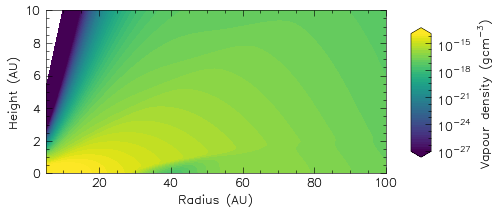

In [58]:
# Plot vapour density

t_snap = -1

fig, ax = plt.subplots(1, 1, figsize=(7, 3), sharex=True, sharey=True)

con = ax.contourf(g.R/au, g.Z/au, np.log10(CO.vap[t_snap,:,:]+1e-100), np.linspace(-27,-14,50), extend='both')

ax.set_ylabel('Height (AU)')
ax.set_xlabel('Radius (AU)')


plt.xlim(5,100)
plt.ylim(0,10)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.2, 0.04, 0.6])
cbar = fig.colorbar(con, cax=cbar_ax)
cbar.set_ticks(np.arange(-27,-12,3))
cbar.set_ticklabels(["$10^{%d}$"%(x) for x in np.arange(-27,-12,3)])
cbar.set_label(r"Vapour density (gcm$^{-3}$)")

plt.show()

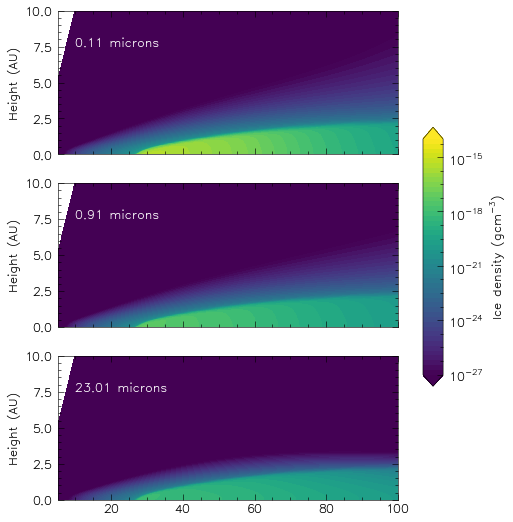

In [59]:
# Plot ice density 

t_snap = -1
grains = [0,20,50]

fig, ax = plt.subplots(len(grains), 1, figsize=(7, 3*len(grains)), sharex=True, sharey=True)

for i in range(len(grains)):
    # ax[i].set_aspect("equal")
    con = ax[i].contourf(g.R/au, g.Z/au, np.log10(CO.ice[t_snap,:,:,grains[i],0]+1e-100), np.linspace(-27,-14,50), extend='both')
    #ax[i].quiver(g.R[::10,:100:10]/au, g.Z[::10,:100:10]/au, (dust.vR[t_snap,::10,:100:10,grains[i]]), (dust.vZ[t_snap,::10,:100:10,grains[i]]), color='white', scale=1000)
    ax[i].text(10,7.5, "%1.2f microns"%(sizes.a_c[grains[i]]*1e4), fontsize=16, c='white')
    ax[i].set_ylabel('Height (AU)')


plt.xlim(5,100)
plt.ylim(0,10)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.3, 0.04, 0.4])
cbar = fig.colorbar(con, cax=cbar_ax)
cbar.set_ticks(np.arange(-27,-12,3))
cbar.set_ticklabels(["$10^{%d}$"%(x) for x in np.arange(-27,-12,3)])
cbar.set_label(r"Ice density (gcm$^{-3}$)")

plt.show()
